# Choosing Proper Number Of K Clusters

Crime hotspots in LA will be solved by using the K Means Algorithm. it is an unsupervised learning algorithm wherein the user identifies the number of clusters, "K", and groups the data together. 

Here are the steps on how Kmeans works:

   1. K centroids will be intialized by the user and is randomly placed depending on the dataset.
   2. The distance between the centroid and the data points will be measured, usually euclidean distance is used.
   3. Datapoints will be assigned closest to the centroid.
       - Boundaries are made by getting the distance between centroids and pass a bisector line between them.
   4. Compute the mean within each cluster.
   5. Repeat steps 2 to 4 till the mean between clusters stops changing, centroids have converged, or maximum iterations have been reached.

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
%matplotlib inline

np.random.seed(7)

In [2]:
df = pd.read_csv("data/crime in la.csv")

In [3]:
df.columns

Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location ', 'latitude',
       'longitude', 'Date Occurred, dayofweek', 'Date Occurred, month',
       'Date Occurred, year', 'Address Type'],
      dtype='object')

# Check for any Outliers in the Data

When performing KMeans, it is important to check for any outliers in the data as it can affect the performance of the algorithm. For example, when there is aprescence of an outlier in the data, there measured loss value would be extremely high. This would force the algorithm to change the centroid from the clustered data into the outlier to minimize the measure loss function.

Text(0.5,1,'Longitude')

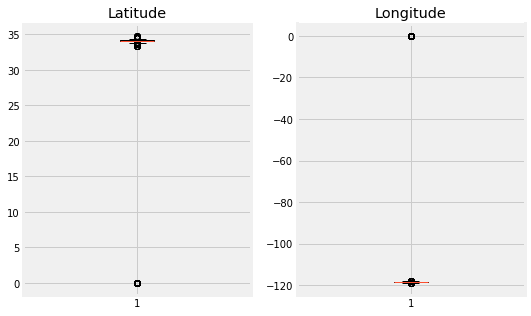

In [4]:
fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 5))

ax1.boxplot(df["latitude"])
ax1.set_title("Latitude")

ax2.boxplot(df["longitude"])
ax2.set_title("Longitude")

Both graphs show a 0 degree geospatial value, which is not possible knowing the range of both latitude and longitude of Los Angeles. The 0 measured value shoudl be taken out from the dataset when performing the KMeans algorithm.

In [5]:
set(df[df["latitude"] == 0].index.tolist()) - set(df[df["longitude"] == 0].index.tolist())

set()

The returned set when both latitude and longitude had been set to 0, is null. This means that there a 0 value from any of the geospatial coorindate would translate to the other.

In [6]:
#take out all 0 measured geosaptial coordinates
df = df[df["longitude"] != 0]

# K Means Preprocessing

Before placing both latitude and longitude vectors into the KMeans algorithm, data normalization should be done so that centroid coordinates will not be distorted. Whenever using K Means, it is assumed that your data is on the same scale.

In [7]:
#initialize minmaxscaler
scaler = MinMaxScaler()

#add variables on transformed features
X_processed = scaler.fit_transform(df[["latitude", "longitude"]])

# Clustering Crime Hotspots in the City

In order to find the proper number of k clusters, one solution would be to use the elbow method. The procedure is done by fitting the KMeans Algorithm into a range of different K clusters, then get the Sum of Squares Error (SSE). Once the data has been collected, plot the data and find the "elbow".

So for this case, it will be done by:

   - Make an empty list to append all the sum of squares error for each "k" clusters.
   - Perform a for loop and make k clusters from 2 to 20.
   - Fit the model for each cluster.
   - Append the Sum of Squares Error, inertia command, into list.
   - Graph Elbow Plot.

In [8]:
#crime and top crimes
wcss_crime = [] #all of the crimes

battery_assault = [] #BATTERY - SIMPLE ASSAULT
burglary_vehicle = [] #BURGLARY FROM VEHICLE
stolen_vehicle = [] #VEHICLE - STOLEN

In [14]:
# plot data coming from sum of squares error
def elbow_plot(elbow_array, crime_done):
    #intialize variables 
    x = range(2, 20)
    y = elbow_array
    
    crime_title = crime_done
    title = "Elbow Method, " + crime_title
    
    fig, ax = plt.subplots()

    ax.plot(x, y)
    ax.set_xticks([i for i in range(2, 20)])
    ax.set_xlabel("K Clusters")
    ax.set_ylabel("Sum of Squares Error")
    
    fig.suptitle(title, fontsize = 16)

In [11]:
def crime_inertia(crime_analyze, crime_list):
    for cluster in range(2, 20):
        kmeans = KMeans(n_clusters = clusters)
        kmeans.fit(crime_analyze)
        crime_list.append(kmeans.inertia_)

In [12]:
wcss_crime = []

for clusters in range(2, 20):
    kmeans = KMeans(n_clusters = clusters)
    kmeans.fit(X_processed)
    wcss_crime.append(kmeans.inertia_)

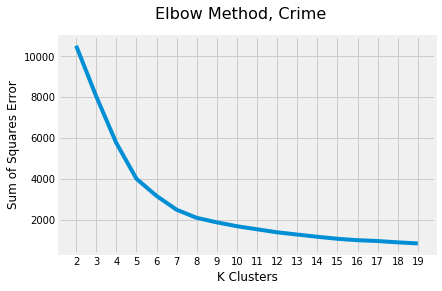

In [15]:
elbow_plot(wcss_crime, "Crime")

The elbow plot shows that the optimized number of clusters are 6. This means that LA has over 6 crime hotspots scatterd all throughout the county. 

# References:

   - K Means Algorithm 
     - https://medium.com/datadriveninvestor/k-means-clustering-b89d349e98e6
     - https://towardsdatascience.com/clustering-using-k-means-algorithm-81da00f156f6
         
   - Elbow Method 
     - https://bl.ocks.org/rpgove/0060ff3b656618e9136b